In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
#from multivariate.py import multivariate_t_rvs
from statsmodels.sandbox.distributions.multivariate import multivariate_t_rvs 

random.seed(12)

In [2]:
def width2var(w):
    var = (w/2)**2
    return var

# Choose roughly 60% of the intended width as width2var param

In [3]:
'''# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (60))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 450, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (40))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'''


"# 1. medium area\nmean_1 = (120, 500, 25)\ncov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]\ndata_1 = np.random.multivariate_normal(mean_1, cov_1, (60))\ndata_1 = data_1.clip(0, 1290)\ncol_1 = 'black'\n\n# 2. expensive area (innenstadt)\nmean_2 = (500, 450, 35)\ncov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]\ndata_2 = np.random.multivariate_normal(mean_2, cov_2, (40))\ndata_2 = data_2.clip(0, 1290)\ncol_2 = 'blue'\n\n# 5. cheap area \nmean_5 = (400, 200, 22)\ncov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]\ndata_5 = np.random.multivariate_normal(mean_5, cov_5, (15))\ndata_5 = data_5.clip(0, 1290)\ncol_5 = 'darkgreen'\n\n# 6. really cheap area\nmean_6 = (150, 150, 15)\ncov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]\ndata_6 = np.random.multivariate_normal(mean_6, cov_6, (15))\ndata_6 = data_6.clip(0, 1290)\ncol_6 = 'orange"

In [42]:
# Areas again

random.seed(12)

# Expensive 1 (Innenstadt)
mean_e1 = (1350, 2500, 35)
cov_e1 = [[width2var(870),0,0], [0, width2var(600),0], [0,0,5]]
data_e1 = np.random.multivariate_normal(mean_e1, cov_e1, (100))
data_e1 = np.c_[data_e1.T[0].clip(0,3543), data_e1.T[1].clip(0,5315), data_e1.T[2]]
col_e1 = 'blue'
print(data_e1.shape)

# Expensive 2 (Öberg)
mean_e2 = (3400, 2200, 35)
cov_e2 = [[width2var(1080),0,0], [0, width2var(720),0], [0,0,5]]
data_e2 = np.random.multivariate_normal(mean_e2, cov_e2, (100))
data_e2 = np.c_[data_e2.T[0][data_e2.T[0] <= 3543], data_e2.T[1].clip(0,5315)[data_e2.T[0] <= 3543], data_e2.T[2][data_e2.T[0] <= 3543]]
col_e2 = 'lightblue'
print(data_e2.shape)

# Expensive 3 (Schlossberg)
mean_e3 = (100, 2900, 35)
cov_e3 =[[width2var(720), width2var(300),0], [width2var(300), width2var(400),0], [0,0,5]]
data_e3 = np.random.multivariate_normal(mean_e3, cov_e3, (100))
data_e3 = np.c_[data_e3.T[0][data_e3.T[0] > 0], data_e3.T[1].clip(0,5315)[data_e3.T[0] > 0], data_e3.T[2][data_e3.T[0] > 0]]
col_e3 = 'darkblue'
print(data_e3.shape)

# Expensive 4 (Alter Güterbahnhof)
mean_e4 = (3543, 3500, 35)
cov_e4 = [[width2var(1400),0,0], [0, width2var(800), 0], [0,0,5]]
data_e4 = np.random.multivariate_normal(mean_e4, cov_e4, (70))
data_e4 = np.c_[data_e4.T[0][data_e4.T[0] <= 3543], data_e4.T[1][data_e4.T[0] <= 3543], data_e4.T[2][data_e4.T[0] <= 3543]]
col_e4 = 'blue'
print(data_e4.shape)

# Medium 1 (WHO/Wanne)
mean_m1 = (2000, 1050, 25)
cov_m1 = [[width2var(1500), width2var(500),0], [width2var(500), width2var(900), 0], [0,0,5]]
data_m1 = np.random.multivariate_normal(mean_m1, cov_m1, (400))
data_m1 = np.c_[data_m1.T[0][(data_m1.T[0] <= 3543) & (data_m1.T[1] > 0)], data_m1.T[1][(data_m1.T[0] <= 3543) & (data_m1.T[1] > 0)], data_m1.T[2][(data_m1.T[0] <= 3543) & (data_m1.T[1] > 0)]]
col_m1 = 'orange'
print(data_m1.shape)

# Medium 2 (Loretto/Franz. Viertel)
mean_m2 = (1770, 4600, 25)
cov_m2 = [[width2var(5400),0,0], [0, width2var(1000),0], [0,0,5]]
data_m2 = np.random.multivariate_normal(mean_m2, cov_m2, (1000))
data_m2 = np.c_[data_m2.T[0][(data_m2.T[0] > 0) & (data_m2.T[0] <= 3543) & (data_m2.T[1] <= 5315)], data_m2.T[1][(data_m2.T[0] > 0) & (data_m2.T[0] <= 3543) & (data_m2.T[1] <= 5315)], data_m2.T[2][(data_m2.T[0] > 0) & (data_m2.T[0] <= 3543) & (data_m2.T[1] <= 5315)]]
col_m2 = 'darkorange'
print(data_m2.shape)

# Medium 3 (Derendingen/Südstadt)
mean_m3 = (1400, 3500, 25)
cov_m3 = [[width2var(1200),0,0], [0, width2var(1000),0], [0,0,5]]
data_m3 = np.random.multivariate_normal(mean_m3, cov_m3, (70))
data_m3 = np.c_[data_m3.T[0][data_m3.T[0] > 0], data_m3.T[1][data_m3.T[0] > 0], data_m3.T[2][data_m3.T[0] > 0]]
col_m3 = 'yellow'
print(data_m3.shape)


# Cheap 1 (weststadt)
mean_c1 = (250, 1400, 15)
cov_c1 = [[width2var(800),0,0], [0, width2var(1500), 0], [0,0,5]]
data_c1 = np.random.multivariate_normal(mean_c1, cov_c1, (250))
data_c1 = np.c_[data_c1.T[0][(data_c1.T[0] > 0) & (data_c1.T[1] > 0)], data_c1.T[1][(data_c1.T[0] > 0) & (data_c1.T[1] > 0)], data_c1.T[2][(data_c1.T[0] > 0) & (data_c1.T[1] > 0)]]
col_c1 = 'pink'
print(data_c1.shape)

(100, 3)
(68, 3)
(61, 3)
(42, 3)
(385, 3)
(439, 3)
(70, 3)
(181, 3)


In [135]:
# Areas again

# Medium 1 (Wanne/WHO)
mean_m1 = (2500, 1000, 25)
cov_m1 = [[width2var(2800), width2var(200), 0], [width2var(200), width2var(1100), 0], [0,0,5]]
data_m1 = np.random.multivariate_normal(mean_m1, cov_m1, (350))
data_m1 = data_m1[(data_m1.T[0] >= 0) & (data_m1.T[0] <=3543) & (data_m1.T[1] >= 0) & (data_m1.T[1] <= 5315)]
col_m = 'orange'
print(data_m1.shape)

# Medium 2 (Südstadt)
mean_m2 = (2500, 4500, 25)
cov_m2 = [[width2var(2500), 0,0], [0, width2var(2500), 0],[0,0,5]]
data_m2 = np.random.multivariate_normal(mean_m2, cov_m2, (400))
data_m2 = data_m2[(data_m2.T[0] >= 0) & (data_m2.T[0] <=3543) & (data_m2.T[1] >= 0) & (data_m2.T[1] <= 5315)]
col_m = 'orange'
print(data_m2.shape)

# Expensive 1 (Öberg, Innenstadt)
mean_e1 = (3500, 2900, 35)
cov_e1 = [[width2var(4000), width2var(100), 0], [width2var(100), width2var(2000), 0], [0,0,5]]
data_e1 = np.random.multivariate_normal(mean_e1, cov_e1, (500))
data_e1 = data_e1[(data_e1.T[0] >= 0) & (data_e1.T[0] <=3543) & (data_e1.T[1] >= 0) & (data_e1.T[1] <= 5315)]
col_e = 'blue'
print(data_e1.shape)

# Expensive 2 (Schlossberg)
mean_e2 = (0, 3000, 35)
cov_e2 = [[width2var(2000), width2var(300), 0], [width2var(300), width2var(750), 0], [0,0,5]]
data_e2 = np.random.multivariate_normal(mean_e2, cov_e2, (100))
data_e2 = data_e2[(data_e2.T[0] >= 0) & (data_e2.T[0] <=3543) & (data_e2.T[1] >= 0) & (data_e2.T[1] <= 5315)]
col_e = 'blue'
print(data_e2.shape)

# Cheap 1 (Weststadt)
mean_c1 = (400, 1000, 15)
cov_c1 = [[width2var(1800), width2var(-100), 0], [width2var(-100), width2var(2000), 0], [0,0,5]]
data_c1 = np.random.multivariate_normal(mean_c1, cov_c1, (350))
data_c1 = data_c1[(data_c1.T[0] >= 0) & (data_c1.T[0] <=3543) & (data_c1.T[1] >= 0) & (data_c1.T[1] <= 5315)]
col_c = 'pink'
print(data_c1.shape)

# Medium 3 (Derendingen)
mean_c2 = (1000, 4500, 25)
cov_c2 = [[width2var(2200), width2var(200), 0], [width2var(200), width2var(1000), 0], [0,0,5]]
data_c2 = np.random.multivariate_normal(mean_c2, cov_c2, (100))
data_c2 = data_c2[(data_c2.T[0] >= 0) & (data_c2.T[0] <=3543) & (data_c2.T[1] >= 0) & (data_c2.T[1] <= 5315)]
col_m = 'orange'
print(data_c2.shape)


(244, 3)
(233, 3)
(215, 3)
(49, 3)
(200, 3)
(65, 3)


In [137]:
data = np.concatenate((data_m1, data_m2, data_e1, data_e2, data_c1, data_c2))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(locs.shape)
print(rents.shape)

(1006, 2)
(1006,)


In [138]:
'''data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(data.shape)
print(data)
print(locs)
print(rents)'''

'data = np.concatenate((data_1, data_2, data_5, data_6))\nlocs = np.c_[data.T[0], data.T[1]]\nrents = data.T[2]\nprint(data.shape)\nprint(data)\nprint(locs)\nprint(rents)'

In [139]:
'''# Create data with t-distributions

# Expensive
loc_e1 = (2500, 2600, 35)
shape = [[700, 50, 0], [50, 300, 0], [0,0,5]]
df = 0.1
data_e1 = multivariate_t_rvs(m=loc_e1, S=shape, df=df, n=30)
data_e1 = data_e1[(data_e1.T[0] >= 0) & (data_e1.T[0] <=3543) & (data_e1.T[1] >= 0) & (data_e1.T[1] <= 5315)]
print(data_e1[0:10])

# Shitty''' 

'# Create data with t-distributions\n\n# Expensive\nloc_e1 = (2500, 2600, 35)\nshape = [[700, 50, 0], [50, 300, 0], [0,0,5]]\ndf = 0.1\ndata_e1 = multivariate_t_rvs(m=loc_e1, S=shape, df=df, n=30)\ndata_e1 = data_e1[(data_e1.T[0] >= 0) & (data_e1.T[0] <=3543) & (data_e1.T[1] >= 0) & (data_e1.T[1] <= 5315)]\nprint(data_e1[0:10])\n\n# Shitty'

(5315, 3543, 3)


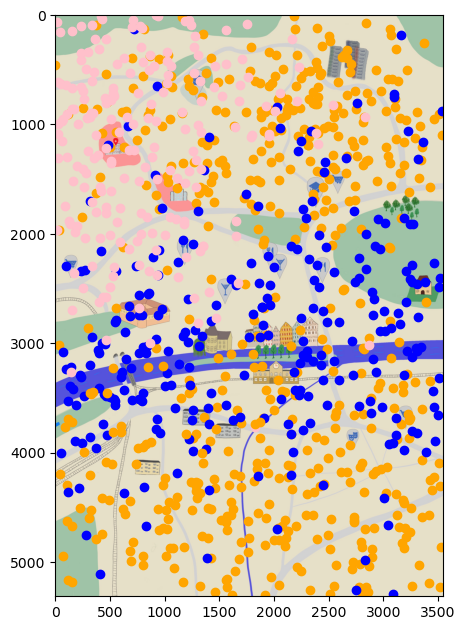

In [140]:
img = plt.imread("../assets/map.jpg")
fig, ax  = plt.subplots(figsize=(5, 16))
ax.imshow(img)
ax.scatter(data_m1.T[0], data_m1.T[1], color=col_m)
ax.scatter(data_m2.T[0], data_m2.T[1], color=col_m)
ax.scatter(data_e1.T[0], data_e1.T[1], color=col_e)
ax.scatter(data_e2.T[0], data_e2.T[1], color=col_e)
ax.scatter(data_c1.T[0], data_c1.T[1], color=col_c)
ax.scatter(data_c2.T[0], data_c2.T[1], color=col_m)
'''ax.scatter(data_e3.T[0], data_e3.T[1], color=col_e3)
ax.scatter(data_e4.T[0], data_e4.T[1], color=col_e4)
ax.scatter(data_m1.T[0], data_m1.T[1], color=col_m1)
ax.scatter(data_m3.T[0], data_m3.T[1], color=col_m3)
'''

print(img.shape)


Next steps:
* Adjust point clouds (more overlap, less houses where shouldn't be any houses)
* Die gelbe Wolke evtl schräg legen
* Train tree

In [131]:
'''img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots(figsize=(9, 16))
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)'''

'img = plt.imread("../assets/map_prototype.jpg")\nfig, ax  = plt.subplots(figsize=(9, 16))\nax.imshow(img)\nax.scatter(data_1.T[0], data_1.T[1], color=col_1)\nax.scatter(data_2.T[0], data_2.T[1], color=col_2)\nax.scatter(data_5.T[0], data_5.T[1], color=col_5)\nax.scatter(data_6.T[0], data_6.T[1], color=col_6)\n\nprint(img.shape)'

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

[Text(0.5, 0.8333333333333334, 'X[1] <= 2081.764\nsquared_error = 51.109\nsamples = 1006\nvalue = 25.594'),
 Text(0.25, 0.5, 'X[0] <= 1336.319\nsquared_error = 42.697\nsamples = 451\nvalue = 21.959'),
 Text(0.125, 0.16666666666666666, 'squared_error = 34.84\nsamples = 201\nvalue = 18.24'),
 Text(0.375, 0.16666666666666666, 'squared_error = 28.947\nsamples = 250\nvalue = 24.95'),
 Text(0.75, 0.5, 'X[1] <= 4028.154\nsquared_error = 38.488\nsamples = 555\nvalue = 28.547'),
 Text(0.625, 0.16666666666666666, 'squared_error = 47.078\nsamples = 356\nvalue = 29.964'),
 Text(0.875, 0.16666666666666666, 'squared_error = 13.107\nsamples = 199\nvalue = 26.013')]

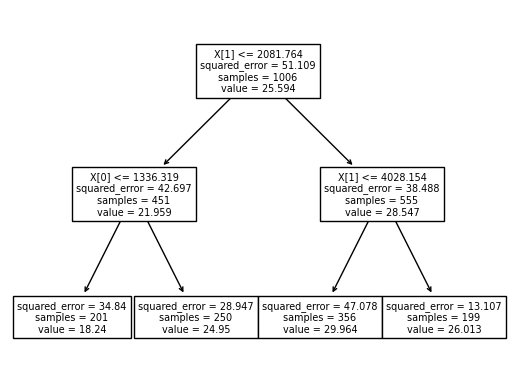

In [142]:
tree.plot_tree(model)

In [143]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(5315, 3543, 3)


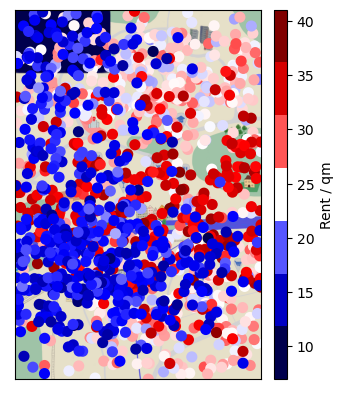

In [90]:
import matplotlib

img = plt.imread("../assets/map.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None